<a href="https://colab.research.google.com/github/njmathai/IntroML/blob/master/LogisticRegressionAutograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# in this example we do logistic regression ({data,label})
# using autograd, and plot the result (points + surface)

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline
import autograd.numpy as np # critical! must use autograd's numpy!
from autograd import grad

def sigmoid(x):
    return 0.5 * (np.tanh(x / 2.) + 1)

def logistic_predictions(weights, inputs):
    # Outputs probability of a label being true according to logistic model.
    return sigmoid(np.dot(inputs, weights))

def linear_predictions(weights, inputs):
  return np.dot(inputs,weights)

def training_loss(weights):
    # Training loss is the negative log-likelihood of the training labels.
    preds = logistic_predictions(weights, inputs)
    label_probabilities = preds * targets + (1 - preds) * (1 - targets)
    return -np.sum(np.log(label_probabilities))

def training_loss_linear(weights):
    # Training loss is the negative log-likelihood of the training labels.
    preds = linear_predictions(weights, inputs)
    loss = 0.5*(preds-targets)**2
    return np.sum(loss)



In [89]:
# Build a toy dataset.
inputs = np.array([[0.52, 1.12,  0.77],
                   [0.88, -1.08, 0.15],
                   [0.52, 0.06, -1.30],
                   [0.74, -2.49, 1.39]])
targets = np.array([True, True, False, True])

# Define a function that returns gradients of training loss using Autograd.
training_gradient_fun = grad(training_loss)
#training_gradient_fun = grad(training_loss_linear)

# Optimize weights using gradient descent.
weights = np.array([0.0, 0.0, 0.0])
print("Initial loss:", training_loss(weights))
for i in range(100):
    weights -= training_gradient_fun(weights) * 0.01

print("Trained loss:", training_loss(weights))

Initial loss: 2.772588722239781
Trained loss: 1.067270675787016


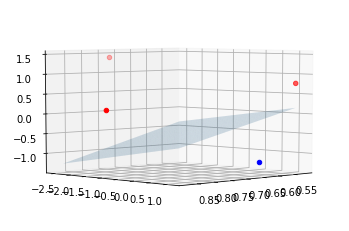

In [90]:
red = inputs[targets == True]
blue = inputs[targets == False]
#print("Reds:",red)
#print("Blue:",blue)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(red[:,0],red[:,1],red[:,2],c='r')
ax.scatter(blue[:,0],blue[:,1],blue[:,2],c='b')

#x_values = np.linspace(-10, 10, 50)
#y_values = np.linspace(-10, 10, 50)
#z_values = np.dot((-1./weights[2]), (np.dot(weights[1],y_values) + np.dot(weights[0],x_values)))

x_values = np.linspace(np.min(inputs[:,0]), np.max(inputs[:,0]), 100)
y_values = np.linspace(np.min(inputs[:,1]), np.max(inputs[:,1]), 100)
xx, yy = np.meshgrid(x_values,y_values)
# calculate corresponding z
z = (-weights[0] * xx - weights[1] * yy ) * 1. /weights[2]
ax.plot_surface(xx, yy, z, alpha=0.2)



#ax.scatter(x_values,y_values,z_values,c='g',marker='^')


#plt.plot(x_values, y_values, label='Decision Boundary')
ax.view_init(elev=5., azim=45)
plt.show()
